<a href="https://colab.research.google.com/github/tomasborrella/TheValley/blob/main/notebooks/mds%2B3/spark02/Introduccion_Spark_DataFrames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introducción Spark DataFrames

Notebook por [Tomás Borrella Martín](https://www.linkedin.com/in/tomasborrella/).

### Enlaces de interés
*   [Slides de presentación](https://docs.google.com/presentation/d/1QApmeKaSXYb8dZdN8WahO4cZ6cft7OupncHW_DijsdA/edit?usp=sharing)

# 1. Instalación Spark

In [ ]:
# Install JAVA
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
# Install Spark
!wget -q https://downloads.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz
!tar xf spark-3.1.2-bin-hadoop2.7.tgz

In [ ]:
# Install findspark
!pip install -q findspark

In [ ]:
# Environment variables
import os 
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

In [ ]:
# Find spark
import findspark
findspark.init()

In [ ]:
# PySpark 
!pip install pyspark==3.1.2

# 2. Spark Session
Punto de entrada de la aplicación de Spark

In [ ]:
# Imports
from pyspark.sql import SparkSession

In [ ]:
# Create Spark Session
spark = (SparkSession
         .builder
         .master("local[*]")
         .appName("Spark Dataframes")
         .getOrCreate()
)

In [ ]:
# Show config
spark.sparkContext.getConf().getAll()

# Cargar datos en un DataFrame

## CSV

In [ ]:
# Descargamos los datos desde Github al entorno de Colab
!wget -P /content/data 'https://raw.githubusercontent.com/tomasborrella/TheValley/main/data/spark02/pokedex.csv'

Leemos el archivo con `SparkSession.read.csv`

Al leer un archivo externo con Spark crea un DataFrame

[Documentación oficial de read](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.SparkSession.read.html#pyspark.sql.SparkSession.read)

In [ ]:
pokedex = spark.read.csv('/content/data/pokedex.csv')

Comprobamos de qué tipo es el objeto que ha creado (DataFrame):

In [ ]:
type(pokedex)

Mostramos información de su esquema con printSchema

[Documentación oficial de printSchema](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.DataFrame.printSchema.html#pyspark.sql.DataFrame.printSchema)

In [ ]:
pokedex.printSchema()

Mostramos el contenido con la acción `show`, que muestra por defecto las primeras 20 líneas del dataframe, pero admite el número de líneas como parámetro.

[Documentación oficial de show](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.DataFrame.show.html)

In [ ]:
pokedex.show(5)

**¿Qué ha pasado?**

Respuesta:

In [ ]:
!echo "UG9yIGRlZmVjdG8gY29uc2lkZXJhIHF1ZSBlbCBmaWNoZXJvIGRlIGRhdG9zIG5vIHRpZW5lIGNhYmVjZXJhIHkgcG9yIHRhbnRvIGhhIGNyZWlkbyBxdWUgbGEgY2FiZWNlcmEgZXMgbGEgcHJpbWVyYSBmaWxhIGRlIGRhdG9zLiBIYXkgcXVlIGVzcGVjaWZpY8OhcnNlbG8gZW4gbGEgbGVjdHVyYS4=" | base64 --decode

In [ ]:
!echo "cG9rZWRleCA9IHNwYXJrLnJlYWQuY3N2KCcvY29udGVudC9kYXRhL3Bva2VkZXguY3N2JywgaGVhZGVyPVRydWUp" | base64 --decode

In [ ]:
pokedex.printSchema()

In [ ]:
pokedex.show(5)

Ya podemos trabajar con el DataFrame, por ejemplo podríamos contar el número de registros con `count`.

[Documentación oficial de count](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.DataFrame.count.html#pyspark.sql.DataFrame.count)

In [ ]:
pokedex.count()

Pero si nos fijamos en el esquema veremos que ha considerado todas las columnas de tipo *string* (es el comportamiento por defecto). Si conocemos el formato de los datos, podemos especificarle el esquema.

In [ ]:
from pyspark.sql.types import StructType, IntegerType, StringType, BooleanType

schema = (
    StructType() 
    .add("Index",IntegerType(),True) 
    .add("Name",StringType(),True) 
    .add("Type1",StringType(),True) 
    .add("Type2",StringType(),True) 
    .add("Total",IntegerType(),True) 
    .add("HP",IntegerType(),True) 
    .add("Attack",IntegerType(),True) 
    .add("Defense",IntegerType(),True) 
    .add("SpecialAtk",IntegerType(),True) 
    .add("SpecialDef",IntegerType(),True) 
    .add("Speed",IntegerType(),True) 
    .add("Generation",IntegerType(),True) 
    .add("Legendary",BooleanType(),True)
)
 
pokedex = spark.read.csv('/content/data/pokedex.csv', header=True, schema=schema)
pokedex.printSchema()

Podemos calcular estadísticas básicas de las columnas con el método `describe`. Es una transformación y por lo tanto es *lazy*

[Documentación oficial de describe](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.DataFrame.describe.html#pyspark.sql.DataFrame.describe)

In [ ]:
pokedex.describe()

Es necesesario utilizar la acción `show` para que realice los cálculos y muestre el resultado

In [ ]:
pokedex.describe().show()

## CSV (más de un archivo)

In [ ]:
# Descargamos 2 archivos desde Github al entorno de Colab (ambos en la misma carpeta)
!wget -P /content/data/pokedex 'https://raw.githubusercontent.com/tomasborrella/TheValley/main/data/spark02/pokedex_part1.csv'
!wget -P /content/data/pokedex 'https://raw.githubusercontent.com/tomasborrella/TheValley/main/data/spark02/pokedex_part2.csv'

Indicando el directorio Spark cargará todos los archivos de esa ruta

In [ ]:
df = spark.read.csv('/content/data/pokedex/', header=True, schema=schema)
df.printSchema()

In [ ]:
df.count()

## Ejercicio propuesto

El csv está un poco "raro", tiene la siguiente forma:

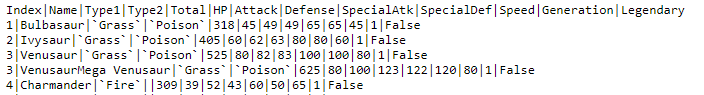

Mirar en la documentación de Spark (en este [enlace](https://spark.apache.org/docs/latest/api/java/org/apache/spark/sql/DataFrameReader.html#csv-scala.collection.Seq-)) qué opciones habría que usar para leerlo

In [ ]:
# Descargamos el archivos desde Github al entorno de Colab
!wget -P /content/data 'https://raw.githubusercontent.com/tomasborrella/TheValley/main/data/spark02/pokedex_raro.csv'

Solución:



In [ ]:
!echo "ZGYgPSAoc3BhcmsucmVhZAogICAgICAub3B0aW9uKCJoZWFkZXIiLCBUcnVlKQogICAgICAub3B0aW9uKCJzZXAiLCAifCIpCiAgICAgIC5vcHRpb24oInF1b3RlIiwgImAiKQogICAgICAuY3N2KCcvY29udGVudC9kYXRhL3Bva2VkZXhfcmFyby5jc3YnKQogICAgICAp" | base64 --decode

## json

json tiene un formato semi-estructurado y su esquema no es estricto, lo que significa que no sabemos los nombres de los campos ni los tipos de datos que podemos esperar hasta que no hayamos leido el fichero completo. Esto puede suponer un problema (de rendimiento) si el archivo es muy grande. Para mitigarlo podemos usar la opción `samplingRatio` o especificar el esquema, si lo conocemos.

[Documentación oficial](https://spark.apache.org/docs/latest/api/java/org/apache/spark/sql/DataFrameReader.html#json-scala.collection.Seq-)

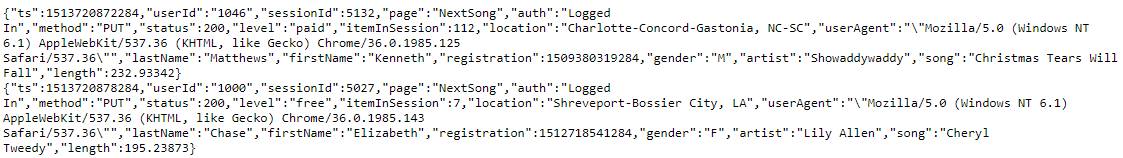

In [ ]:
# Descargamos los datos desde Github al entorno de Colab
!wget -P /content/data 'https://raw.githubusercontent.com/tomasborrella/TheValley/main/data/spark02/songs_log_small.json'

In [ ]:
# Cargamos los datos en Spark
user_log = spark.read.json('/content/data/songs_log_small.json')

In [ ]:
user_log.printSchema()

In [ ]:
user_log.show(5)

# Guardar datos

Para escribir datos se utiliza `write`

[Documentación oficial de write](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.DataFrame.write.html#pyspark.sql.DataFrame.write)

Un dataframe que hemos creado partiendo de un json podemos guardarlo como un csv o en cualquier otro formato soportado por Spark.

In [ ]:
user_log.write.save('data/songs_log_small.csv', format='csv', header=True)

Después de escribir el csv, volvemos a leerlo como comprobación

In [ ]:
user_log_2 = spark.read.csv('data/songs_log_small.csv', header=True)

In [ ]:
user_log_2.printSchema()

Si queremos obtener registros como una lista podemos usar take

[Documentación oficial de take](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.DataFrame.take.html#pyspark.sql.DataFrame.take)

In [ ]:
user_log_2.take(3)

In [ ]:
user_log_2.count()

Desde luego hemos sido capaces de leer el archivo que hemos creado desde el DataFrame, y todo parece correcto. Ahora vamos a comprobarlo en el sistema de archivos... **¿Qué es lo que ha pasado?**

Respuesta: 

In [ ]:
!echo "VGVuZHJlbW9zIHRhbnRvcyBhcmNoaXZvcyBjb21vIHBhcnRpY2lvbmVzIHR1dmnDqXJhbW9zIChlbiBlc3RlIGNhc28gMikuIExlZXIgZGlzdGludG9zIGFyY2hpdm9zIG5vIGVzIHByb2JsZW1hIHBhcmEgU3BhcmssIHBvcnF1ZSB5YSBoZW1vcyB2aXN0byBlbiB1biBlamVtcGxvIHByZXZpbyBxdWUgcG9kZW1vcyBsZWVyIHRvZG9zIGxvcyBjc3YgcXVlIGVzdMOpbiBlbiB1bmEgbWlzbWEgY2FycGV0YS4=" | base64 --decode

Si quisiéramos tener un único archivo, tendríamos que reparticionar los datos usando `coallesce(1)`

[Documentación oficial coallesce](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.DataFrame.coalesce.html#pyspark.sql.DataFrame.coalesce)

In [ ]:
user_log.coalesce(1).write.save('data/songs_log_small_one.csv', format='csv', header=True)

# Spark Stop

In [ ]:
spark.stop()